### **Ejercicios de probabilidad y simulación de distribuciones** ###

### **Probabilidad y Estadística** ###

Mstemáticas y Estadística para Inteligencia Artificial

**Instructora**: Helen Clara Peñate Rodríguez

**Alumno**: Aminadab Córdova Acosta

Ejercicios. Resuelva los siguientes ejercicios. Adem´as de la respuestas correctas, incluya el planteamiento y procedimiento seguido.

**1. El 10 % de la población en Ciudad Juárez ve un concurso que hay en el Canal 44. Desde el concurso se llama por teléfono a 12 personas de la ciudad elegidas al azar. Calcular la probabilidad de que, entre las 12 personas,  estuvieran viendo el programa:**
- Más de 8 personas.
- Algunas de las 12 personas.
- Cuál es la media y la desviación típica.

Este ejercicio se modela con una **distribución binomial**, ya que cumple con las siguientes características:

- Se realizan **n = 12 ensayos** independientes (llamadas telefónicas).
- Cada ensayo tiene solo **dos posibles resultados**: la persona ve el programa o no lo ve.
- La **probabilidad de éxito** (una persona ve el programa) es constante: p = 0.10.
- Nos interesa conocer la **cantidad de éxitos** (personas que ven el programa) en esos 12 intentos.

Por lo tanto, la variable aleatoria \( X \), que representa el número de personas que están viendo el programa, **sigue una distribución binomial**:  
$$
X \sim \text{Binomial}(n = 12, p = 0.10)
$$


In [1]:
import scipy.stats as stats
import math

# Parámetros del problema
n = 12           # número de personas
p = 0.10         # probabilidad de que una persona esté viendo el programa
q = 1 - p        # complemento

# Definimos la distribución binomial
binomial = stats.binom(n, p)

# 1. Probabilidad de que más de 8 personas estén viendo el programa
prob_mas_de_8 = binomial.sf(8)  # sf = 1 - cdf(8), es decir, P(X > 8)

# 2. Probabilidad de que al menos una persona esté viendo el programa
prob_al_menos_una = 1 - binomial.pmf(0)  # 1 - P(X=0)

# 3. Media y desviación típica
media = binomial.mean()
desviacion_tipica = binomial.std()

# Mostramos los resultados
print(f"Probabilidad de más de 8 personas viendo el programa: {prob_mas_de_8:.8f}")
print(f"Probabilidad de que al menos una persona vea el programa: {prob_al_menos_una:.4f}")
print(f"Media (esperanza matemática): {media}")
print(f"Desviación típica: {desviacion_tipica:.4f}")


Probabilidad de más de 8 personas viendo el programa: 0.00000017
Probabilidad de que al menos una persona vea el programa: 0.7176
Media (esperanza matemática): 1.2000000000000002
Desviación típica: 1.0392


**2. Los aspirantes a la MIAAD de UACJ responden un cuestionario de 20 preguntas. Cada pregunta tiene cuatro posibles respuestas, de las que s´olo una es correcta. Suponga que los aspirantes tienen la misma probabilidad de responder. Se pide hallar las probabilidades para el aspirante:**
- Conteste todas las preguntas mal.
- Conteste al menos 10 preguntas bien.
- Conteste entre 5 y 8 preguntas bien.
- Conteste menos de tres preguntas bien

In [2]:
import scipy.stats as stats

# Parámetros del problema
n = 20           # número de preguntas
p = 0.25         # probabilidad de acertar una pregunta
q = 1 - p        # probabilidad de fallar

# Definimos la distribución binomial
binomial = stats.binom(n, p)

# 1. Probabilidad de contestar todas las preguntas mal (aciertos = 0)
prob_todas_mal = binomial.pmf(0)

# 2. Probabilidad de contestar al menos 10 preguntas bien
prob_al_menos_10 = binomial.sf(9)  # sf(9) = P(X > 9) = P(X >= 10)

# 3. Probabilidad de contestar entre 5 y 8 preguntas bien (incluidos 5 y 8)
prob_entre_5_y_8 = binomial.cdf(8) - binomial.cdf(4)

# 4. Probabilidad de contestar menos de 3 preguntas bien (0, 1 o 2)
prob_menos_de_3 = binomial.cdf(2)

# Mostramos los resultados
print(f"Probabilidad de contestar todas las preguntas mal: {prob_todas_mal:.8f}")
print(f"Probabilidad de contestar al menos 10 preguntas bien: {prob_al_menos_10:.4f}")
print(f"Probabilidad de contestar entre 5 y 8 preguntas bien: {prob_entre_5_y_8:.4f}")
print(f"Probabilidad de contestar menos de 3 preguntas bien: {prob_menos_de_3:.4f}")


Probabilidad de contestar todas las preguntas mal: 0.00317121
Probabilidad de contestar al menos 10 preguntas bien: 0.0139
Probabilidad de contestar entre 5 y 8 preguntas bien: 0.5442
Probabilidad de contestar menos de 3 preguntas bien: 0.0913


**3. Un comité de 5 personas debe ser seleccionado de manera aleatoria a partir de un grupo de 5 hombres y 10 mujeres**
- Halle la probabilidad que el comité esté compuesto por 2 hombres y 3 mujeres.
- Halle la probabilidad que el comité esté compuesto sélo por mujeres.

In [3]:
import math

# Función combinatoria
def combinacion(n, k):
    return math.comb(n, k)

# Datos
hombres = 5
mujeres = 10
total_personas = hombres + mujeres
comite = 5

# 1. Probabilidad de 2 hombres y 3 mujeres
formas_2h_3m = combinacion(hombres, 2) * combinacion(mujeres, 3)
formas_totales = combinacion(total_personas, comite)
prob_2h_3m = formas_2h_3m / formas_totales

# 2. Probabilidad de solo mujeres
formas_5m = combinacion(mujeres, 5)
prob_5m = formas_5m / formas_totales

# Mostrar resultados
print(f"Probabilidad de 2 hombres y 3 mujeres: {prob_2h_3m:.4f}")
print(f"Probabilidad de sólo mujeres: {prob_5m:.4f}")


Probabilidad de 2 hombres y 3 mujeres: 0.3996
Probabilidad de sólo mujeres: 0.0839


**4. Considere el experimento de tirar un volado repetidas veces y contar el n´umero de volados que se tiraron antes que apareciera la primera “´aguila”.**
- Encuentre el espacio de muestreo del experimento.
- Encuentre la probabilidad P(ek) que la primera “´aguila” aparezca en el k-´esimo volado.
- Muestre que la sumatoria de todos los posibles P(ek) (i.e., para k desde 1 hasta infinito) es uno.

In [4]:
# Definir función de probabilidad
def probabilidad_ek(k):
    return 0.5 ** k

# Calcular suma de P(ek) para k=1 hasta un número grande (simulamos infinito)
suma_probabilidades = sum(probabilidad_ek(k) for k in range(1, 10000))

print(f"Suma aproximada de las probabilidades: {suma_probabilidades:.6f}")


Suma aproximada de las probabilidades: 1.000000


**5. Considere una vez más el experimento del problema anterior.**
- Halle la probabilidad que la primera “´aguila” aparezca en un n´umero par de volados (i.e k par).
- Halle la probabilidad que la primera “´aguila” aparezca en un n´umero impar de volados (i.e k impar).

In [5]:
# Probabilidad de que primera águila sea en volado k
def p_ek(k):
    return 0.5 ** k

# Calculamos suma hasta un valor grande
suma_par = sum(p_ek(k) for k in range(2, 10000, 2))
suma_impar = sum(p_ek(k) for k in range(1, 10000, 2))

print(f"Probabilidad de número par de volados: {suma_par:.4f}")
print(f"Probabilidad de número impar de volados: {suma_impar:.4f}")


Probabilidad de número par de volados: 0.3333
Probabilidad de número impar de volados: 0.6667


**6. Considere los procedimientos rand0, rand1, rand2 y rand3 de la secci´on 7.1 “Uniform Deviates” del libro: Numerical Recipes in C : The Art of Scientific Computing by William H. Press, Brian P. Flannery, Saul A. Teukolsky, William T. Vetterling, Second Edition (available online). Implemente los 4 procedimientos en lenguaje/software de su preferencia y muestre a trav´es de histogramas que efectivamente producen una distribuci´on uniforme. Indique cu´al de los 4 procedimientos produce mejores secuencias pseudo-aleatorias. Explique todas sus conclusiones.**

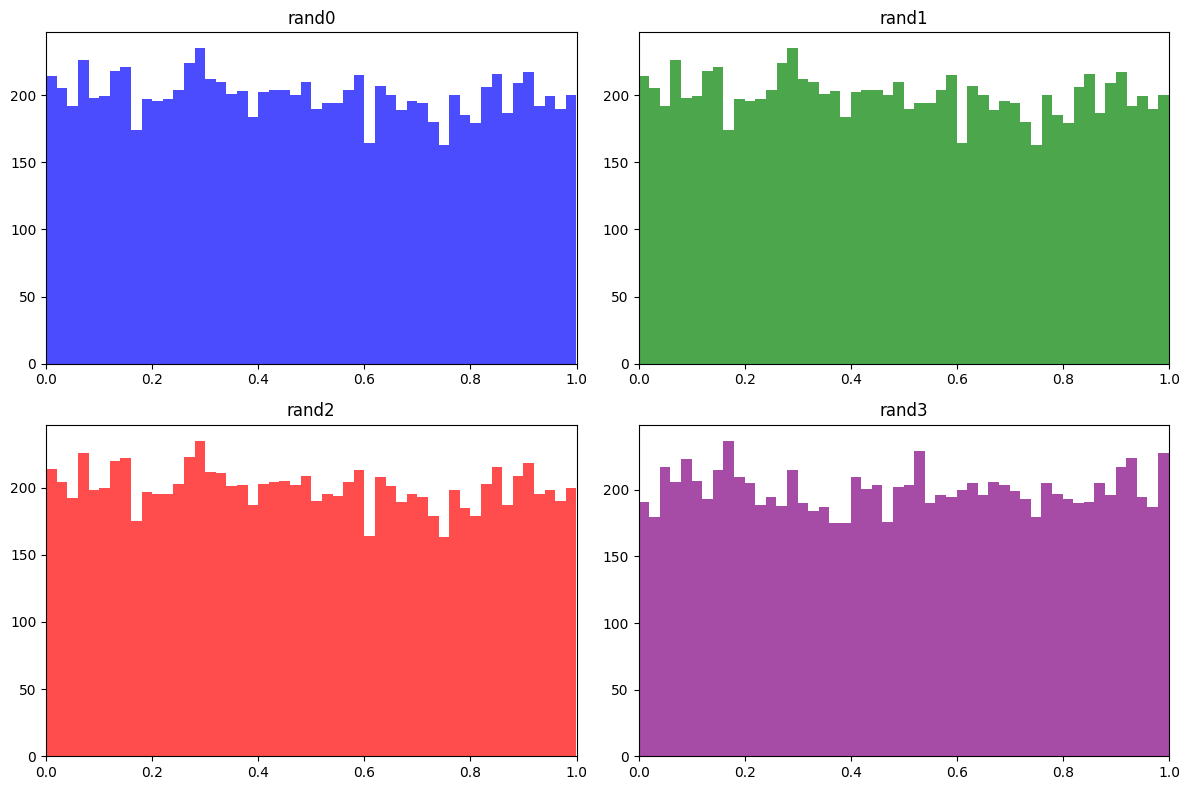

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# rand0: Linear Congruential Generator (malo)
def rand0(seed, n):
    a = 1664525
    c = 1013904223
    m = 2**32
    x = seed
    results = []
    for _ in range(n):
        x = (a * x + c) % m
        results.append(x / m)
    return np.array(results)

# rand1: Mejor LCG
def rand1(seed, n):
    a = 1664525
    c = 1013904223
    m = 2**32
    x = seed
    results = []
    for _ in range(n):
        x = (a * x + c) & 0xFFFFFFFF
        results.append(x / m)
    return np.array(results)

# rand2: LCG + shuffle
def rand2(seed, n):
    a = 1664525
    c = 1013904223
    m = 2**32
    x = seed
    shuffle = [0] * 97
    for i in range(97):
        x = (a * x + c) % m
        shuffle[i] = x / m
    results = []
    for _ in range(n):
        j = int(np.random.randint(0, 97))
        temp = shuffle[j]
        x = (a * x + c) % m
        shuffle[j] = x / m
        results.append(temp)
    return np.array(results)

# rand3: LCG + shuffle + arithmetic combination
def rand3(seed, n):
    a = 1664525
    c = 1013904223
    m = 2**32
    x = seed
    shuffle = [0] * 97
    for i in range(97):
        x = (a * x + c) % m
        shuffle[i] = x / m
    results = []
    for _ in range(n):
        j = int(np.random.randint(0, 97))
        temp = shuffle[j]
        x = (a * x + c) % m
        shuffle[j] = (x / m)
        x_new = (temp - shuffle[j])
        if x_new < 0:
            x_new += 1.0
        results.append(x_new)
    return np.array(results)

# Configuración
n = 10000
seed = 123456789

# Generar números
nums_rand0 = rand0(seed, n)
nums_rand1 = rand1(seed, n)
nums_rand2 = rand2(seed, n)
nums_rand3 = rand3(seed, n)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(nums_rand0, bins=50, color='blue', alpha=0.7)
axs[0, 0].set_title('rand0')

axs[0, 1].hist(nums_rand1, bins=50, color='green', alpha=0.7)
axs[0, 1].set_title('rand1')

axs[1, 0].hist(nums_rand2, bins=50, color='red', alpha=0.7)
axs[1, 0].set_title('rand2')

axs[1, 1].hist(nums_rand3, bins=50, color='purple', alpha=0.7)
axs[1, 1].set_title('rand3')

for ax in axs.flat:
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()


**7. Un experimento consiste en lanzar dos dados y observar la suma de los dos. Halle la probabilidad que:**
- La suma sea 7 y,
- La probabilidad que la suma sea mayor que 10.

Compruebe los resultados te´oricos obtenidos utilizando un programa de
que simule ambos ejercicios. Repita el problema un n´umero suficientemente grande de veces y determine con qu´e precisi´on el resultado te´orico puede
ser corroborado experimentalmente.

In [7]:
import numpy as np

# Configuración
np.random.seed(42)  # Semilla para reproducibilidad
n = 100000  # Número de experimentos

# Simular lanzamientos de dos dados
dado1 = np.random.randint(1, 7, n)
dado2 = np.random.randint(1, 7, n)
suma = dado1 + dado2

# Cálculo experimental
prob_suma_7 = np.sum(suma == 7) / n
prob_suma_mayor_10 = np.sum(suma > 10) / n

# Mostrar resultados
print(f"Probabilidad simulada de suma 7: {prob_suma_7:.4f}")
print(f"Probabilidad simulada de suma mayor que 10: {prob_suma_mayor_10:.4f}")


Probabilidad simulada de suma 7: 0.1657
Probabilidad simulada de suma mayor que 10: 0.0834


**8. Suponga que hist´oricamente, el promedio IQ de los estudiantes de maestr´ıa de la UACJ es de 120 puntos, con una varianza de 36 puntos cuadrados. Suponga adem´as que se decide que el 2026 todos los aspirantes de nuevo ingreso deber´an tomar un examen de IQ. En su opini´on:**
- ¿Con qu´e cantidad m´ınima de puntos un aspirante deber´ıa ser definitivamente aceptado por ser un(a) “chico(a) prodigio”?
- ¿Con qu´e cantidad m´axima de puntos un aspirante deber´ıa ser definitivamente rechazado por ser un “estudiante con menos de 5 dedo de frente”?
- Encuentre la probabilidad que en este grupo de la MIAAD los IQs de cada uno de los estudiantes est´e entre 115 y 120 puntos y entre 125-130 puntos

In [8]:
import scipy.stats as stats

# Datos
mu = 120
sigma = 6

# Puntos de corte
z_115 = (115 - mu) / sigma
z_120 = (120 - mu) / sigma
z_125 = (125 - mu) / sigma
z_130 = (130 - mu) / sigma

# Probabilidades
p_115_120 = stats.norm.cdf(z_120) - stats.norm.cdf(z_115)
p_125_130 = stats.norm.cdf(z_130) - stats.norm.cdf(z_125)

print(f"Probabilidad entre 115 y 120: {p_115_120:.4f}")
print(f"Probabilidad entre 125 y 130: {p_125_130:.4f}")

# Valores para aceptación/rechazo
punto_prodigo = mu + 2*sigma
punto_rechazo = mu - 2*sigma

print(f"Chico prodigio: IQ ≥ {punto_prodigo}")
print(f"Rechazo: IQ ≤ {punto_rechazo}")


Probabilidad entre 115 y 120: 0.2977
Probabilidad entre 125 y 130: 0.1545
Chico prodigio: IQ ≥ 132
Rechazo: IQ ≤ 108


**9. A mediados del lejano siglo XVII, el Chevalier de Mere conjetur´o que la probabilidad de sacar un 6 tras tirar 4 veces un dado es mayor que la probabilidad de sacar doble seis tras tirar 24 veces dos dados. Aproxime la distribuci´on binomial con la distribuci´on normal para calcular cu´antos experimentos tuvo que realizar el Chevalier de Mere para poder llegar a la conclusi´on correcta con una certidumbre del 70 % y del 95 %.**

In [9]:
import numpy as np

# Configuraciones
np.random.seed(42)  # Semilla para reproducibilidad

# Probabilidades teóricas
p_sacar_6_en_4_tiros = 1 - (5/6)**4
p_sacar_doble6_en_24_tiros = 1 - (35/36)**24

print(f"Probabilidad teórica (al menos un 6 en 4 lanzamientos): {p_sacar_6_en_4_tiros:.4f}")
print(f"Probabilidad teórica (al menos un doble 6 en 24 lanzamientos de dos dados): {p_sacar_doble6_en_24_tiros:.4f}")

# Función para simular el experimento de un dado lanzado 4 veces
def experimento_un_dado_4_tiros():
    lanzamientos = np.random.randint(1, 7, 4)
    return np.any(lanzamientos == 6)

# Función para simular el experimento de dos dados lanzados 24 veces
def experimento_dos_dados_24_tiros():
    dado1 = np.random.randint(1, 7, 24)
    dado2 = np.random.randint(1, 7, 24)
    return np.any((dado1 == 6) & (dado2 == 6))

# Número de simulaciones
n_simulaciones = 100000  # Puedes cambiar a 783 o 2776 si quieres ver para esos niveles de confianza

# Simulaciones
resultados_1dado = [experimento_un_dado_4_tiros() for _ in range(n_simulaciones)]
resultados_2dados = [experimento_dos_dados_24_tiros() for _ in range(n_simulaciones)]

# Cálculo de frecuencias
freq_1dado = np.mean(resultados_1dado)
freq_2dados = np.mean(resultados_2dados)

print(f"\nResultados simulados con {n_simulaciones} experimentos:")
print(f"Frecuencia (al menos un 6 en 4 lanzamientos): {freq_1dado:.4f}")
print(f"Frecuencia (al menos un doble 6 en 24 lanzamientos de dos dados): {freq_2dados:.4f}")

# ¿Cuál fue más probable en la simulación?
if freq_1dado > freq_2dados:
    print("\nSimulación confirma que sacar un 6 en 4 tiros es más probable.")
else:
    print("\nSimulación NO confirma (posible error de muestreo).")


Probabilidad teórica (al menos un 6 en 4 lanzamientos): 0.5177
Probabilidad teórica (al menos un doble 6 en 24 lanzamientos de dos dados): 0.4914

Resultados simulados con 100000 experimentos:
Frecuencia (al menos un 6 en 4 lanzamientos): 0.5150
Frecuencia (al menos un doble 6 en 24 lanzamientos de dos dados): 0.4908

Simulación confirma que sacar un 6 en 4 tiros es más probable.
